In [1]:
# Supervised Learning Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import joblib

# Load dataset with selected features
df = pd.read_csv('../results/selected_features_dataset.csv')

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (242, 8)
Testing set shape: (61, 8)


In [3]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"{name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

# Create comprehensive visualizations
plt.figure(figsize=(20, 15))


Training Logistic Regression...
Logistic Regression Results:
  Accuracy: 0.8033
  Precision: 0.7561
  Recall: 0.9394
  F1-Score: 0.8378

Training Decision Tree...
Decision Tree Results:
  Accuracy: 0.7705
  Precision: 0.7879
  Recall: 0.7879
  F1-Score: 0.7879

Training Random Forest...
Random Forest Results:
  Accuracy: 0.7705
  Precision: 0.7436
  Recall: 0.8788
  F1-Score: 0.8056

Training SVM...
SVM Results:
  Accuracy: 0.8197
  Precision: 0.7750
  Recall: 0.9394
  F1-Score: 0.8493


<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVM')])

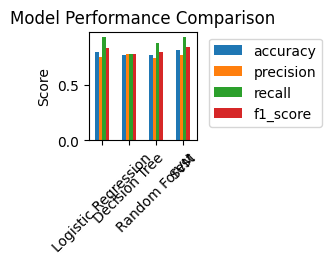

In [4]:

# 1. Model Performance Comparison
plt.subplot(3, 4, 1)
metrics_df = pd.DataFrame(results).T[['accuracy', 'precision', 'recall', 'f1_score']]
metrics_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)


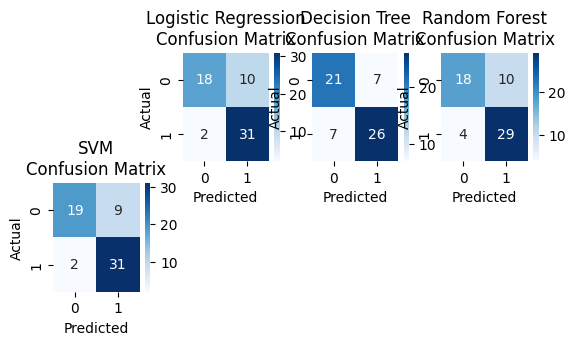

In [5]:
# 2-5. Confusion Matrices
for i, (name, result) in enumerate(results.items(), 2):
    plt.subplot(3, 4, i)
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nConfusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

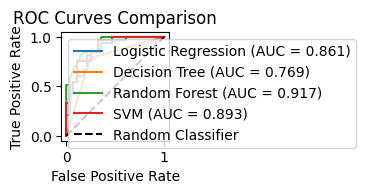

In [6]:
# 6. ROC Curves
plt.subplot(3, 4, 6)
for name, result in results.items():
    if result['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()

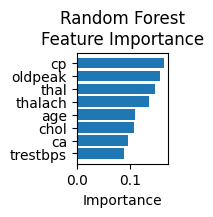

In [7]:

# 7. Feature Importance (Random Forest)
if 'Random Forest' in trained_models:
    plt.subplot(3, 4, 7)
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Random Forest\nFeature Importance')
    plt.xlabel('Importance')

plt.tight_layout()
plt.show()


In [8]:

# Print detailed classification reports
print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORTS")
print("="*50)

for name, result in results.items():
    print(f"\n{name}:")
    print(classification_report(y_test, result['predictions']))

# Find best performing model
best_model_name = max(results.keys(), key=lambda k: results[k]['f1_score'])
best_model = trained_models[best_model_name]

print(f"\n🏆 Best performing model: {best_model_name}")
print(f"   F1-Score: {results[best_model_name]['f1_score']:.4f}")



DETAILED CLASSIFICATION REPORTS

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61


Decision Tree:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.81        33

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.

In [9]:

# Save best model
joblib.dump(best_model, f'../models/{best_model_name.lower().replace(" ", "_")}_model.pkl')

# Save all results
results_df = pd.DataFrame(results).T
results_df.to_csv('../results/supervised_learning_results.csv')

print(f"\n✔️ Models trained and evaluated")
print(f"✔️ Best model saved as: {best_model_name.lower().replace(' ', '_')}_model.pkl")
print(f"✔️ Results saved to supervised_learning_results.csv")


✔️ Models trained and evaluated
✔️ Best model saved as: svm_model.pkl
✔️ Results saved to supervised_learning_results.csv
